**UCS2612 - Machine Learning Lab**

**Assignment 7**

**Predicting Diabetes using Decision Tree**
** **

**Name:** Naren Srinivasan M

**Section:** CSE-A

**RegNo:** 3122 21 5001 057
** **
**Aim**:

Develop a python program to predict diabetics using Decision Tree Model. Visualize the features from the
dataset and interpret the results obtained by the model using Matplotlib library.

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with
their diabetes status (positive or negative). The data includes features such as age, gender, body mass index
(BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset
can be used to build machine learning models to predict diabetes in patients based on their medical history
and demographic information. This can be useful for healthcare professionals in identifying patients who
may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the
dataset can be used by researchers to explore the relationships between various medical and demographic
factors and the likelihood of developing diabetes.


# **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.decomposition import PCA
import scipy.stats
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier


pd.set_option('display.float_format', lambda x: '%.2f' % x)
%matplotlib inline


# Loading dataset

In [ ]:
data = pd.read_csv('/home/mllab2/Desktop/Machine Learning/diabetes_prediction_dataset.csv')

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [ ]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


# Pre-processing the data

In [ ]:
data['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

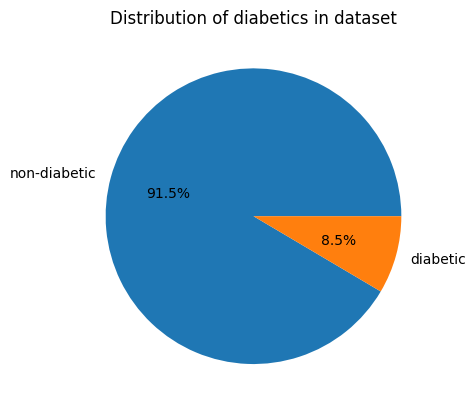

In [ ]:
plt.pie(data['diabetes'].value_counts(), labels = ['non-diabetic', 'diabetic'],
       autopct = '%1.1f%%')
plt.title("Distribution of diabetics in dataset")
plt.show()

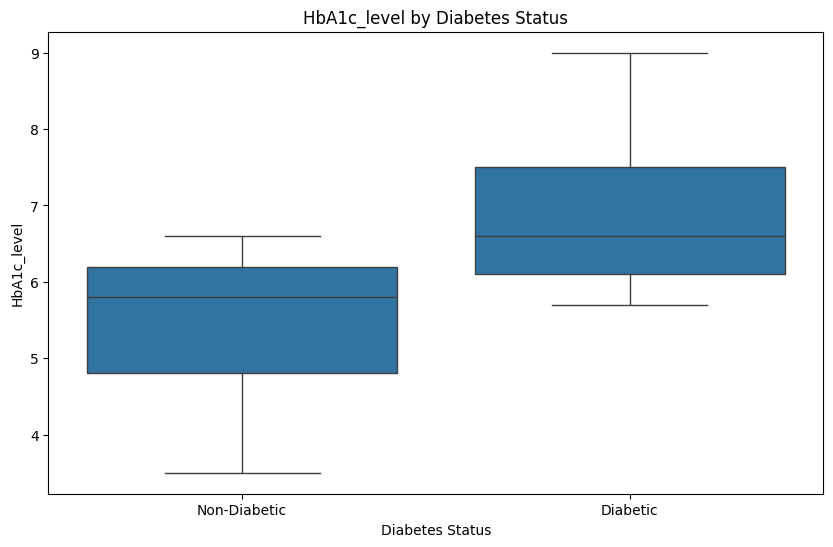

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='HbA1c_level', data=data)
plt.title('HbA1c_level by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('HbA1c_level')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])  # Adjust based on your 'diabetes' column encoding
plt.show()

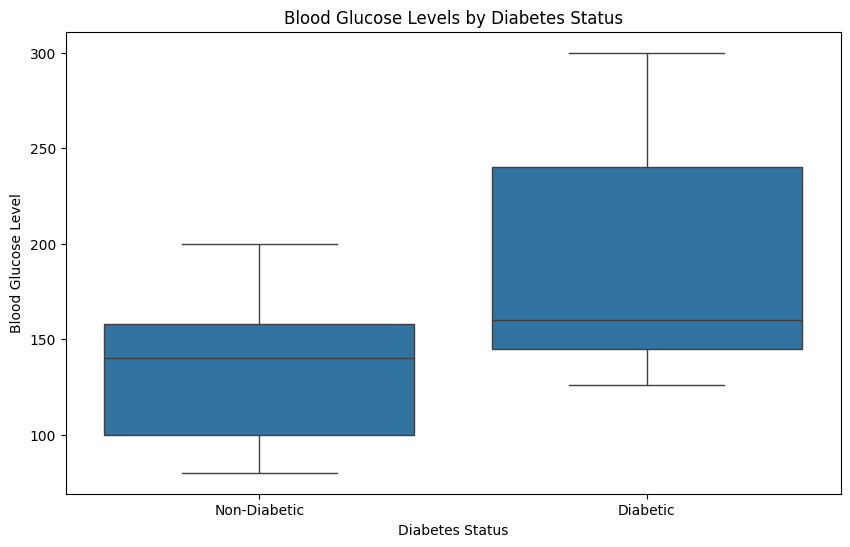

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=data)
plt.title('Blood Glucose Levels by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Blood Glucose Level')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['smoking_history'] = label_encoder.fit_transform(data['smoking_history'])
data['gender'] = label_encoder.fit_transform(data['gender'])
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.00,0,1,4,25.19,6.60,140,0
1,0,54.00,0,0,0,27.32,6.60,80,0
2,1,28.00,0,0,4,27.32,5.70,158,0
3,0,36.00,0,0,1,23.45,5.00,155,0
4,1,76.00,1,1,1,20.14,4.80,155,0


In [ ]:
numeric_data = data.select_dtypes(include='number')
print(numeric_data)


       gender   age  hypertension  heart_disease  smoking_history   bmi  \
0           0 80.00             0              1                4 25.19   
1           0 54.00             0              0                0 27.32   
2           1 28.00             0              0                4 27.32   
3           0 36.00             0              0                1 23.45   
4           1 76.00             1              1                1 20.14   
...       ...   ...           ...            ...              ...   ...   
99995       0 80.00             0              0                0 27.32   
99996       0  2.00             0              0                0 17.37   
99997       1 66.00             0              0                3 27.83   
99998       0 24.00             0              0                4 35.42   
99999       0 57.00             0              0                1 22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0             6.60                  140        

In [ ]:
numerical_columns = ['age', 'bmi', 'HbA1c_level','smoking_history', 'blood_glucose_level']

In [ ]:
z_scores = data[numerical_columns].apply(zscore)
print(z_scores)

        age   bmi  HbA1c_level  smoking_history  blood_glucose_level
0      1.69 -0.32         1.00             0.96                 0.05
1      0.54 -0.00         1.00            -1.15                -1.43
2     -0.62 -0.00         0.16             0.96                 0.49
3     -0.26 -0.58        -0.49            -0.62                 0.42
4      1.52 -1.08        -0.68            -0.62                 0.42
...     ...   ...          ...              ...                  ...
99995  1.69 -0.00         0.63            -1.15                -1.18
99996 -1.77 -1.50         0.91            -1.15                -0.93
99997  1.07  0.08         0.16             0.43                 0.42
99998 -0.79  1.22        -1.43             0.96                -0.93
99999  0.67 -0.74         1.00            -0.62                -1.18

[100000 rows x 5 columns]


In [ ]:
# Define threshold for outlier detection (e.g., Z-Score > 3)
threshold = 3
# Find outliers
outliers = data[z_scores > threshold]
print(outliers)

       gender  age  hypertension  heart_disease  smoking_history  bmi  \
0         NaN  NaN           NaN            NaN              NaN  NaN   
1         NaN  NaN           NaN            NaN              NaN  NaN   
2         NaN  NaN           NaN            NaN              NaN  NaN   
3         NaN  NaN           NaN            NaN              NaN  NaN   
4         NaN  NaN           NaN            NaN              NaN  NaN   
...       ...  ...           ...            ...              ...  ...   
99995     NaN  NaN           NaN            NaN              NaN  NaN   
99996     NaN  NaN           NaN            NaN              NaN  NaN   
99997     NaN  NaN           NaN            NaN              NaN  NaN   
99998     NaN  NaN           NaN            NaN              NaN  NaN   
99999     NaN  NaN           NaN            NaN              NaN  NaN   

       HbA1c_level  blood_glucose_level  diabetes  
0              NaN                  NaN       NaN  
1              NaN 

In [ ]:
outliers_count = (z_scores.abs() > threshold).sum().sum()
print("Number of outliers:", outliers_count)

Number of outliers: 4012


In [ ]:
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
print(data.head())

   gender  age  hypertension  heart_disease  smoking_history  bmi  \
0       0 1.00             0              1             0.80 0.18   
1       0 0.67             0              0             0.00 0.20   
2       1 0.35             0              0             0.80 0.20   
3       0 0.45             0              0             0.20 0.16   
4       1 0.95             1              1             0.20 0.12   

   HbA1c_level  blood_glucose_level  diabetes  
0         0.56                 0.27         0  
1         0.56                 0.00         0  
2         0.40                 0.35         0  
3         0.27                 0.34         0  
4         0.24                 0.34         0  


In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.00,0,1,0.80,0.18,0.56,0.27,0
1,0,0.67,0,0,0.00,0.20,0.56,0.00,0
2,1,0.35,0,0,0.80,0.20,0.40,0.35,0
3,0,0.45,0,0,0.20,0.16,0.27,0.34,0
4,1,0.95,1,1,0.20,0.12,0.24,0.34,0


# Exploratory Data Analysis

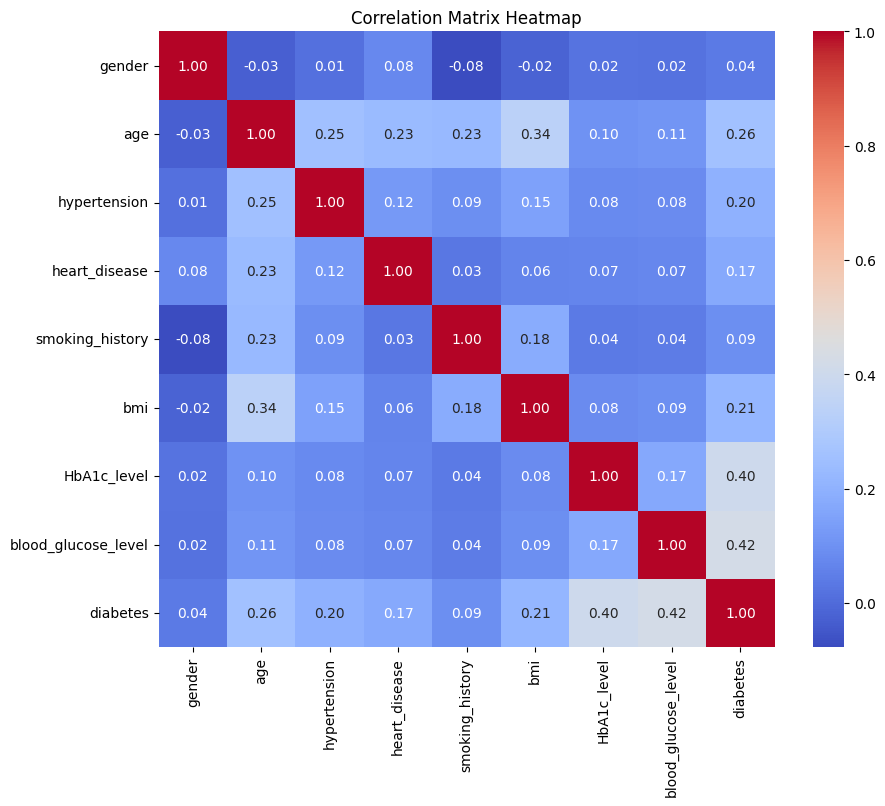

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Split the data into training, testing and validation sets.

In [ ]:
X = data.drop(columns=['diabetes'], axis=1)
y = data['diabetes']

In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train = pd.DataFrame((X_train_raw), columns=X_train_raw.columns)
X_test =  pd.DataFrame((X_test_raw), columns=X_test_raw.columns)
X_test.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75721,0,0.16,0,0,0.00,0.13,0.42,0.21
80184,0,0.04,0,0,0.00,0.13,0.27,0.30
19864,1,0.79,0,0,0.60,0.18,0.00,0.55
76699,0,0.02,0,0,0.80,0.09,0.47,0.21
92991,0,0.41,0,0,1.00,0.35,0.49,0.55


# Train the model

In [ ]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [ ]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
n_components_90 = (cumulative_variance <= 0.90).sum()
print("Number of components to explain 90% variance:", n_components_90)

Number of components to explain 90% variance: 5


In [ ]:
pca = PCA(n_components=5, random_state=42)
pca.fit(X_train)

X_train_PCA = pd.DataFrame(pca.transform(X_train))
X_test_PCA = pd.DataFrame(pca.transform(X_test))

In [ ]:
X_train_PCA.columns = [str(column_name) for column_name in X_train_PCA.columns]
X_test_PCA.columns = [str(column_name) for column_name in X_test_PCA.columns]

In [ ]:
X_train_PCA.head()

,0,1,2,3,4
0,0.58,0.06,-0.01,-0.11,-0.06
1,0.51,0.47,-0.09,-0.19,-0.33
2,-0.37,-0.39,-0.13,0.07,-0.26
3,-0.38,-0.22,0.20,-0.17,0.17
4,0.66,-0.46,-0.13,0.12,0.02


# Test the model

In [ ]:
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_train_PCA, y_train)

DecisionTreeClassifier()

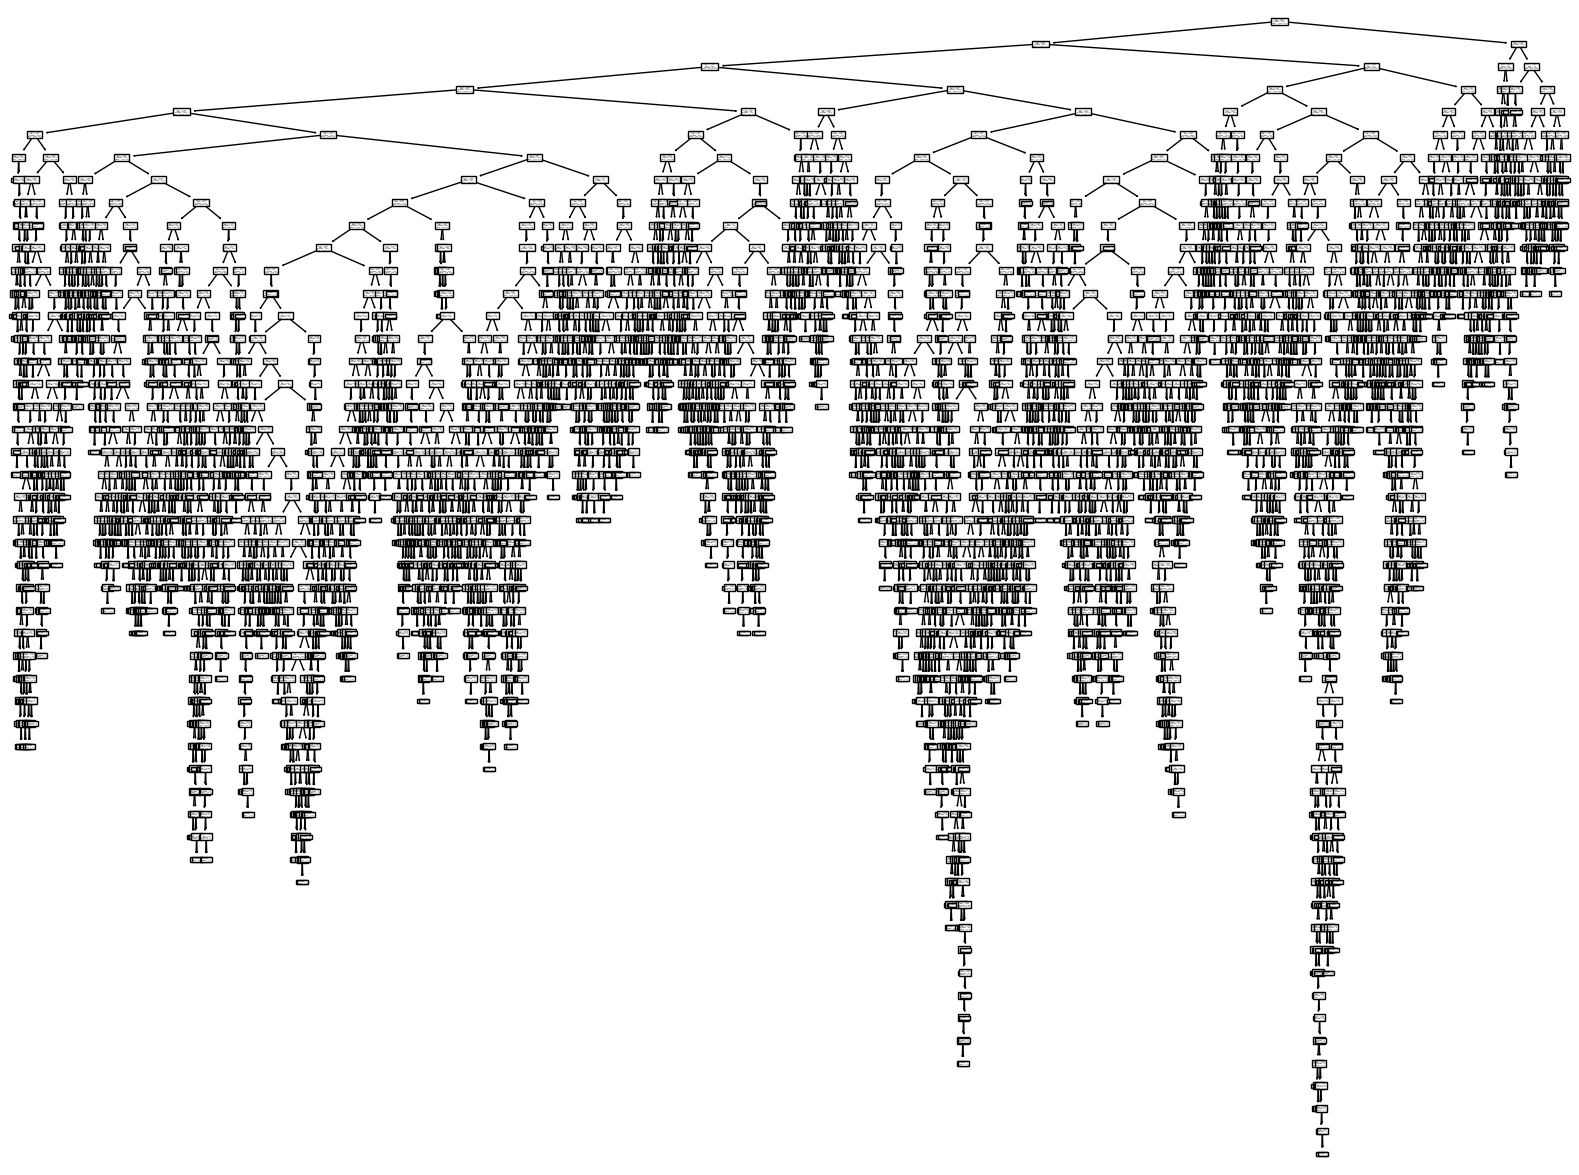

In [ ]:
fig = plt.figure(figsize=(20,15))
tree.plot_tree(model);

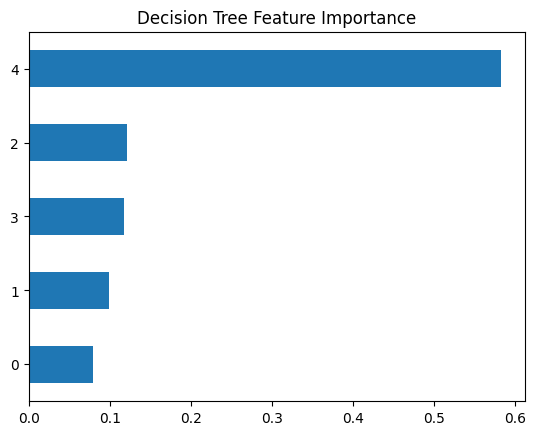

In [ ]:
feature_importances = pd.Series(model.feature_importances_, model.feature_names_in_).sort_values()
feature_importances.plot.barh();
plt.title('Decision Tree Feature Importance');

In [ ]:
y_pred_test = model.predict(X_test_PCA)
y_pred_train= model.predict(X_train_PCA)

# Measure the performance of the trained model

In [ ]:
train_decision_tree_report = classification_report(y_train, y_pred_train)
print(train_decision_tree_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64047
           1       1.00      0.99      1.00      5953

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000



In [ ]:
test_decision_tree_report = classification_report(y_test, y_pred_test)
print(test_decision_tree_report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     27453
           1       0.63      0.62      0.63      2547

    accuracy                           0.94     30000
   macro avg       0.80      0.79      0.80     30000
weighted avg       0.94      0.94      0.94     30000



# Represent the results using graphs


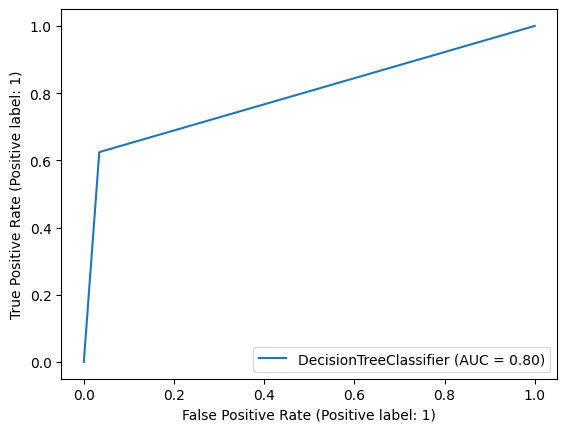

In [ ]:
RocCurveDisplay.from_estimator(model, X_test_PCA, y_test)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy_without_pca = accuracy_score(y_test, y_pred)
print("Accuracy without PCA:", accuracy_without_pca)

Accuracy without PCA: 0.9399285714285714


In [ ]:

X = data.drop(columns=['diabetes'], axis=1)
y = data['diabetes']
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train_raw shape:", X_train_raw.shape)
print("y_train shape:", y_train.shape)
print("X_test_raw shape:", X_test_raw.shape)
print("y_test shape:", y_test.shape)

dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train_raw, y_train)

y_pred_entropy = dt_entropy.predict(X_test_raw)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy using Entropy impurity measure without PCA:", accuracy_entropy)

dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train_raw, y_train)

y_pred_gini = dt_gini.predict(X_test_raw)

accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Accuracy using Gini-index impurity measure without PCA:", accuracy_gini)


X_train_raw shape: (70000, 8)
y_train shape: (70000,)
X_test_raw shape: (30000, 8)
y_test shape: (30000,)
Accuracy using Entropy impurity measure without PCA: 0.9542666666666667
Accuracy using Gini-index impurity measure without PCA: 0.9530333333333333


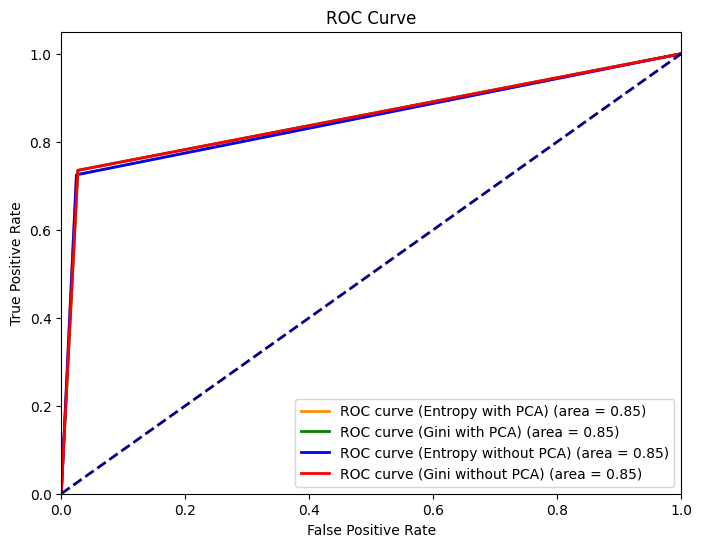

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_entropy_no_pca = dt_entropy.predict(X_test_raw)
y_pred_gini_no_pca = dt_gini.predict(X_test_raw)

fpr_entropy_pca, tpr_entropy_pca, _ = roc_curve(y_test, y_pred_entropy)
roc_auc_entropy_pca = auc(fpr_entropy_pca, tpr_entropy_pca)

fpr_gini_pca, tpr_gini_pca, _ = roc_curve(y_test, y_pred_gini)
roc_auc_gini_pca = auc(fpr_gini_pca, tpr_gini_pca)

fpr_entropy_no_pca, tpr_entropy_no_pca, _ = roc_curve(y_test, y_pred_entropy_no_pca)
roc_auc_entropy_no_pca = auc(fpr_entropy_no_pca, tpr_entropy_no_pca)

fpr_gini_no_pca, tpr_gini_no_pca, _ = roc_curve(y_test, y_pred_gini_no_pca)
roc_auc_gini_no_pca = auc(fpr_gini_no_pca, tpr_gini_no_pca)

plt.figure(figsize=(8, 6))
plt.plot(fpr_entropy_pca, tpr_entropy_pca, color='darkorange', lw=2, label='ROC curve (Entropy with PCA) (area = %0.2f)' % roc_auc_entropy_pca)
plt.plot(fpr_gini_pca, tpr_gini_pca, color='green', lw=2, label='ROC curve (Gini with PCA) (area = %0.2f)' % roc_auc_gini_pca)
plt.plot(fpr_entropy_no_pca, tpr_entropy_no_pca, color='blue', lw=2, label='ROC curve (Entropy without PCA) (area = %0.2f)' % roc_auc_entropy_no_pca)
plt.plot(fpr_gini_no_pca, tpr_gini_no_pca, color='red', lw=2, label='ROC curve (Gini without PCA) (area = %0.2f)' % roc_auc_gini_no_pca)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
print("X_train_raw shape:", X_train_raw.shape)
print("y_train shape:", y_train.shape)
print("X_test_raw shape:", X_test_raw.shape)
print("y_test shape:", y_test.shape)


X_train_raw shape: (70000, 8)
y_train shape: (70000,)
X_test_raw shape: (30000, 8)
y_test shape: (30000,)


# **Inference**

1. Accuracy using Entropy impurity measure without PCA: 0.9542666666666667

   Accuracy using Gini-index impurity measure without PCA: 0.9530333333333333

2. Accuracy using Entropy impurity measure with PCA: 0.9377857142857143
  
   Accuracy using Gini-index impurity measure with PCA: 0.9399285714285714


As we can clearly see that the accuracy of the decision tree classifier using Gini-index and Entropy using PCA gives less accuracy than without using PCA.



#**Learning Outcome**

1. Applying standardisation and other pre-processing techniques.
2. Splitting the data according to PCA.
3. Understanding Decision Tree classifier Algorithm.
4. Implementing decision tree classifier model.